In [93]:
# import necessary modulus 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from urllib.request import urlopen 
from bs4 import BeautifulSoup
import re

from pylab import rcParams
import seaborn as sns, numpy as np

In [94]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2019&sort=num_votes,desc&page=1'
response = get(url)

In [95]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [96]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')

In [97]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [98]:
pages = [str(i) for i in range(0,9)]
years_url = [str(i) for i in range(2010,2019)]

In [99]:
from time import sleep
from random import randint

In [100]:
from time import time;start_time = time()
from datetime import timedelta
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.3320902361699865 requests/s
Request: 2; Frequency: 0.49849401895102663 requests/s
Request: 3; Frequency: 0.4277753270058088 requests/s
Request: 4; Frequency: 0.44366741868167764 requests/s
Request: 5; Frequency: 0.4538833507374269 requests/s


In [101]:
from IPython.core.display import clear_output
# start_time = time()requests = 0
for _ in range(10):
# Start to reaquest
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 6; Frequency: 0.49887318614786424 requests/s
Request: 7; Frequency: 0.46579562312989464 requests/s
Request: 8; Frequency: 0.49912270875110126 requests/s
Request: 9; Frequency: 0.528514663895841 requests/s
Request: 10; Frequency: 0.4992731602477715 requests/s
Request: 11; Frequency: 0.5230794131277997 requests/s
Request: 12; Frequency: 0.5447188552148651 requests/s
Request: 13; Frequency: 0.5409707042566533 requests/s
Request: 14; Frequency: 0.5179116246759505 requests/s
Request: 15; Frequency: 0.49946696820397957 requests/s


In [102]:
from warnings import warn
warn("Warning Simulation")

C:\Users\gladies\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


In [103]:
# Given lists for storage
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
grade_class = []
runing_time = []
moviegenre = []

# Start request and check requst response
start_time = time()
requests = 0

# lopping from pages 2010-2019
for year_url in years_url:

    # looping the page
    for page in pages:

        # Ask a request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Sleep 
        sleep(randint(8,15))

        # Check request and monitor request response
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Thrown warning 
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break reqesuts for >100
        if requests > 100:
            warn('Number of requests was greater than expected.')
            break

        # Parse to beautiful stoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Find items and put into containers
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # Movie container for each page
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))
                
                # Scrape the grade
                grade = container.find('span', class_ = 'certificate').text
                grade_class.append(grade) 
                
                # Scrape the runtime
                runtime = container.find('span', class_ = 'runtime').text
                runing_time.append(runtime) 
                
                # Scrape the genre
                genre = container.find('span', class_ = 'genre').text
                moviegenre.append(genre) 

Request:81; Frequency: 0.07688542618304425 requests/s


In [104]:
import pandas as pd 
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes,
'grade': grade_class,
'runtime': runing_time,
'genre': moviegenre                               
})
print(movie_ratings.info())
movie_ratings.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 8 columns):
movie        3690 non-null object
year         3690 non-null object
imdb         3690 non-null float64
metascore    3690 non-null int64
votes        3690 non-null int64
grade        3690 non-null object
runtime      3690 non-null object
genre        3690 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 230.8+ KB
None


,movie,year,imdb,metascore,votes,grade,runtime,genre
3680,Sicario: Day of the Soldado,(2018),7.1,61,103786,R,122 min,"\nAction, Crime, Drama"
3681,Ralph Breaks the Internet,(2018),7.1,71,103685,PG,112 min,"\nAnimation, Adventure, Comedy"
3682,The Predator,(2018),5.4,48,102975,R,107 min,"\nAction, Adventure, Sci-Fi"
3683,The Nun,(2018),5.3,46,100165,R,96 min,"\nHorror, Mystery, Thriller"
3684,A Simple Favor,(2018),6.8,67,98667,R,117 min,"\nComedy, Crime, Drama"
3685,Halloween,(I) (2018),6.6,67,98328,R,106 min,"\nHorror, Thriller"
3686,The Ballad of Buster Scruggs,(2018),7.3,79,96315,R,133 min,"\nComedy, Drama, Musical"
3687,Maze Runner: The Death Cure,(2018),6.2,50,96196,PG-13,143 min,"\nAction, Sci-Fi, Thriller"
3688,Pacific Rim: Uprising,(2018),5.6,44,93526,PG-13,111 min,"\nAction, Adventure, Sci-Fi"
3689,Tag,(I) (2018),6.5,56,93459,R,100 min,\nComedy


In [105]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes', 'grade', 'runtime', 'genre']]
movie_ratings.head()

,movie,year,imdb,metascore,votes,grade,runtime,genre
0,Inception,(2010),8.8,74,1884515,PG-13,148 min,"\nAction, Adventure, Sci-Fi"
1,Shutter Island,(2010),8.1,63,1031485,R,138 min,"\nMystery, Thriller"
2,Toy Story 3,(2010),8.3,92,704131,G,103 min,"\nAnimation, Adventure, Comedy"
3,Iron Man 2,(2010),7.0,57,674392,PG-13,124 min,"\nAction, Adventure, Sci-Fi"
4,Black Swan,(2010),8.0,79,659640,R,108 min,"\nDrama, Thriller"


In [106]:
movie_ratings['year'].unique()

array(['(2010)', '(I) (2010)', '(2011)', '(I) (2011)', '(2012)',
       '(I) (2012)', '(2013)', '(I) (2013)', '(2014)', '(I) (2014)',
       '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)', '(2016)',
       '(II) (2016)', '(I) (2016)', '(IX) (2016)', '(2017)', '(I) (2017)',
       '(2018)', '(I) (2018)', '(III) (2018)'], dtype=object)

In [107]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [108]:
movie_ratings['year'].tail(3)

3687    2018
3688    2018
3689    2018
Name: year, dtype: int32

In [109]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,27.0
max,8.8,100.0


In [110]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,grade,runtime,genre,n_imdb
0,Inception,2010,8.8,74,1884515,PG-13,148 min,"\nAction, Adventure, Sci-Fi",88.0
1,Shutter Island,2010,8.1,63,1031485,R,138 min,"\nMystery, Thriller",81.0
2,Toy Story 3,2010,8.3,92,704131,G,103 min,"\nAnimation, Adventure, Comedy",83.0


In [111]:
#Remove unwanted character in genre
genre_list = movie_ratings['genre'].tolist()
genre_name = []
for i in genre_list:
    name = i.strip("\n")
    genre_name.append(name)
#pass name back to genre_list
movie_ratings['genre'] = genre_name
movie_ratings.head(5)
print(movie_ratings.head(5))

            movie  year  imdb  metascore    votes  grade  runtime  \
0       Inception  2010   8.8         74  1884515  PG-13  148 min   
1  Shutter Island  2010   8.1         63  1031485      R  138 min   
2     Toy Story 3  2010   8.3         92   704131      G  103 min   
3      Iron Man 2  2010   7.0         57   674392  PG-13  124 min   
4      Black Swan  2010   8.0         79   659640      R  108 min   

                                      genre  n_imdb  
0     Action, Adventure, Sci-Fi                88.0  
1             Mystery, Thriller                81.0  
2  Animation, Adventure, Comedy                83.0  
3     Action, Adventure, Sci-Fi                70.0  
4               Drama, Thriller                80.0  


In [112]:
movie_ratings.to_csv('cs5010_movie_ratings.csv')

No handles with labels found to put in legend.


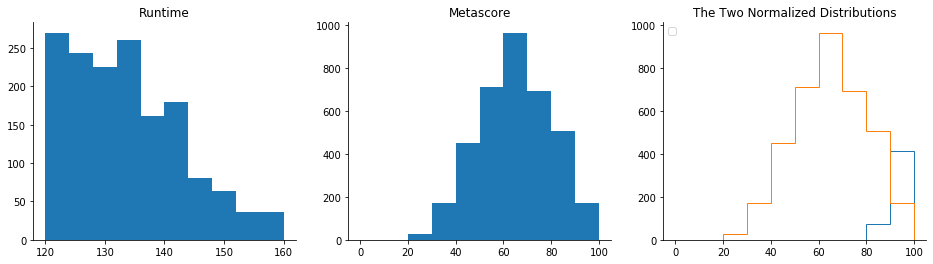

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['runtime'], bins = 10, range = (120,160)) # bin range = 1
ax1.set_title('Runtime')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['runtime'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

No handles with labels found to put in legend.


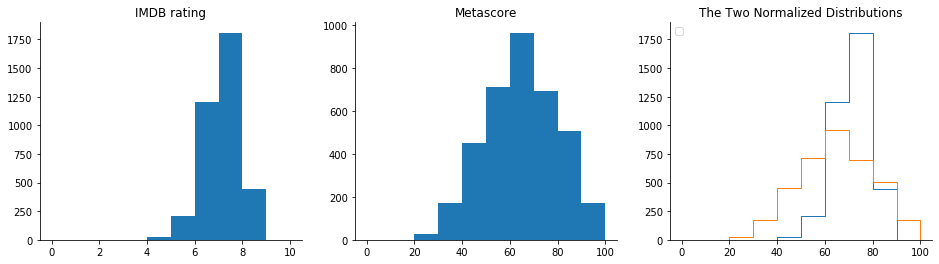

In [114]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

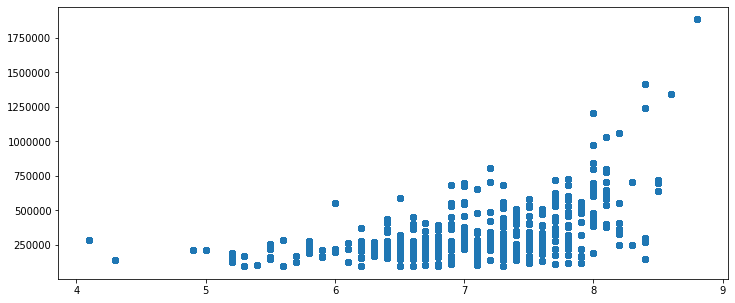

In [115]:
#Start to make charts and do statistical analysis
import seaborn as sns, numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)
plt.scatter(movie_ratings.imdb, movie_ratings.votes)
plt.show()

In [116]:
df = movie_ratings
print(df['runtime'])

0       148 min
1       138 min
2       103 min
3       124 min
4       108 min
         ...   
3685    106 min
3686    133 min
3687    143 min
3688    111 min
3689    100 min
Name: runtime, Length: 3690, dtype: object


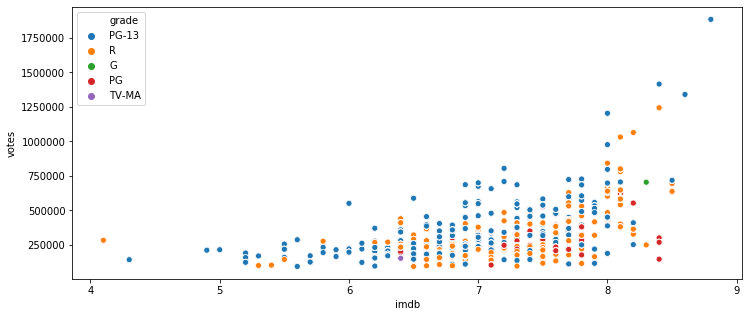

In [117]:
ax = sns.scatterplot(x="imdb", y="votes", hue="grade",data=df)

In [118]:
#Need to change format of Volume from string to numeric 
runtime_num_list = df['runtime'].tolist()
runtime_num = []
for i in runtime_num_list:
    if i.endswith('min'):
        num = i.strip("min")
        runtime_num.append(num)
#pass num back to Volume_list
df['runtime'] = runtime_num
df.head(5)
df['runtime'] = pd.to_numeric(df['runtime'])

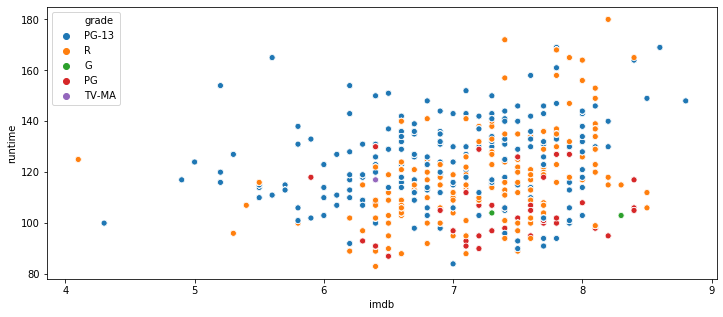

In [119]:
ax = sns.scatterplot(x="imdb", y="runtime", hue="grade",data=df)
yticks=np.arange(120,170,5)

In [120]:
df = movie_ratings
df.describe()

,year,imdb,metascore,votes,runtime,n_imdb
count,3690.000000,3690.000000,3690.000000,3.690000e+03,3690.000000,3690.000000
mean,2013.985366,7.107561,64.485366,3.353975e+05,119.797561,71.075610
std,2.591100,0.730896,15.330229,2.102873e+05,17.408287,7.308964
min,2010.000000,4.100000,27.000000,9.345900e+04,83.000000,41.000000
25%,2012.000000,6.600000,53.000000,1.982990e+05,107.000000,66.000000
50%,2014.000000,7.200000,65.000000,2.682660e+05,118.000000,72.000000
75%,2016.000000,7.700000,75.000000,4.093370e+05,131.000000,77.000000
max,2018.000000,8.800000,100.000000,1.884515e+06,180.000000,88.000000


Text(0.5, 1.0, 'imdb rating by grade')

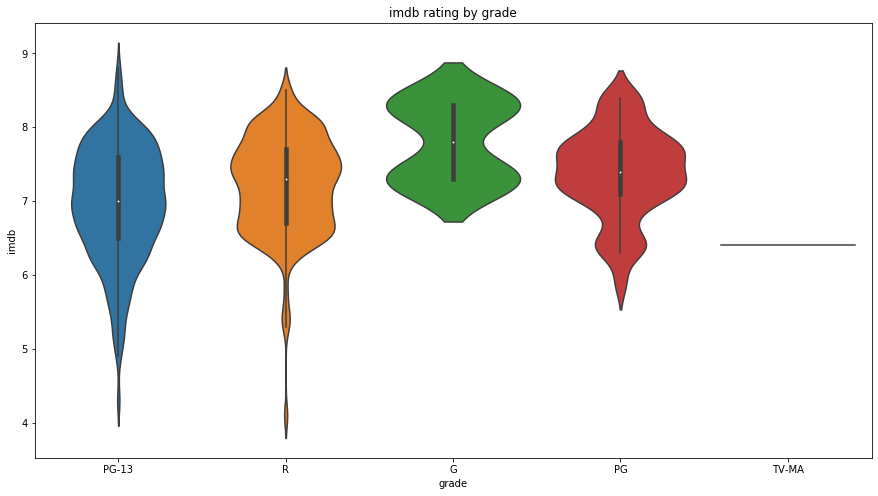

In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=df, x='grade', y='imdb')
viz_2.set_title('imdb rating by grade')

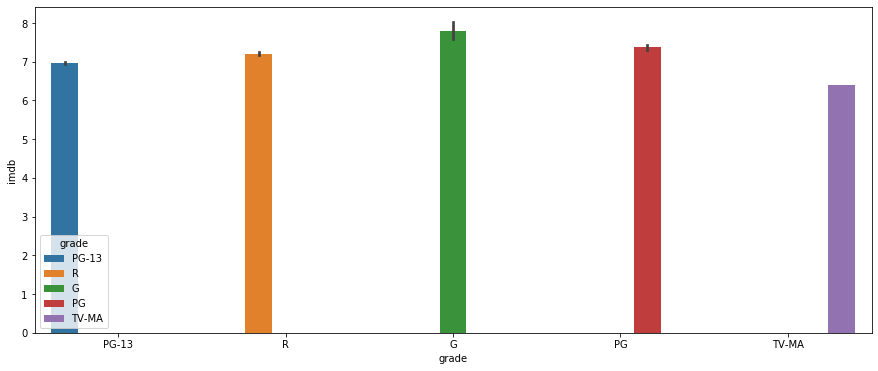

In [122]:
df = movie_ratings
plt.figure(figsize=(15, 6))
sns.barplot(x='grade', y='imdb', hue='grade',data=df)

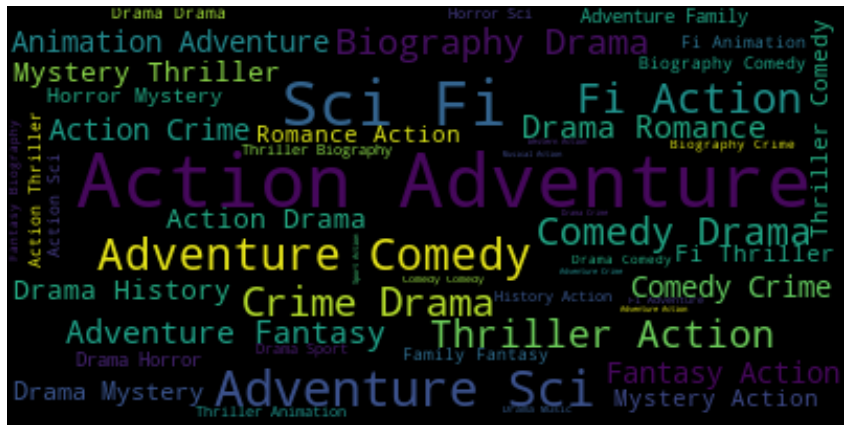

In [123]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.genre)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=400).generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [124]:
import sys
print(sys.executable)

C:\Users\gladies\Anaconda3\python.exe
